In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from preprocess import preprocess_data_waged, preprocess_data_selfemp
from learners import s_learner_att_ate_per_treatment, t_learner_att_ate_per_treatment
from learners import ipw_att_ate_per_treatment, matching_learner_att_ate_per_treatment
font_size = 12

In [65]:
# set seed
seed = 42
np.random.seed(seed)
random.seed(seed)

In [66]:
# Load dataset
raw_data = pd.read_csv('./data/pppub22.csv')

### Data pre-processing

In [108]:
data_subsets, data = preprocess_data_waged(raw_data)

college 659.0
bachelors 2588.0
masters 1146.0
prof 155.0
doctorate 226.0


/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data.loc[:, 'A_HGA'] = raw_data['A_HGA'].apply(encode_edu)
/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data.loc[:, 'A_SEX'] = 1 * (raw_data['A_SEX'] == 1)


## Calculate causal effect - Waged individuals

### Covariate adjustment - ATE

In [109]:
ate_out, att_out = s_learner_att_ate_per_treatment(data_subsets, seed)

S-Learner results:


  0%|          | 0/3 [00:00<?, ?it/s]

In [110]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

Linear          Random Forest  \
ATE College         (3.25, 2.99, 3.55)     (2.81, 2.46, 3.13)   
    Bachelor     (13.07, 12.78, 13.25)   (11.96, 11.7, 12.16)   
    Master       (18.49, 17.89, 18.77)  (17.52, 16.86, 18.15)   
    Prof.degree  (26.19, 25.28, 27.32)  (25.88, 24.45, 27.22)   
    Doctor       (22.76, 21.95, 23.44)  (23.71, 22.27, 25.07)   
ATT College         (3.43, 3.17, 3.73)     (3.01, 2.56, 3.25)   
    Bachelor     (12.97, 12.77, 13.16)   (12.46, 12.26, 12.7)   
    Master       (18.55, 18.11, 19.01)  (17.95, 17.57, 18.31)   
    Prof.degree   (26.22, 25.12, 27.3)  (25.25, 24.03, 26.49)   
    Doctor       (22.91, 22.17, 23.93)  (22.92, 22.21, 23.61)   

                               XGBoost  
ATE College         (2.63, 2.38, 2.88)  
    Bachelor     (11.82, 11.57, 12.02)  
    Master       (17.61, 16.79, 17.99)  
    Prof.degree  (25.18, 23.72, 26.63)  
    Doctor       (23.64, 22.67, 24.43)  
ATT College          (2.76, 2.5, 3.18)  
    Bachelor     (12.42, 12.14, 12.62)  
    Master        (17.75, 17.2, 18.32)  
    Prof.degree  (25.15, 24.19, 26.05)  
    Doctor       (22.66, 21.97, 23.48)

In [111]:
ate_out, att_out = t_learner_att_ate_per_treatment(data_subsets, seed)

T-Learner results:


  0%|          | 0/3 [00:00<?, ?it/s]

In [112]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

Linear          Random Forest  \
ATE College          (3.57, 3.2, 3.78)     (2.92, 2.52, 3.23)   
    Bachelor     (12.98, 12.74, 13.17)   (11.78, 11.6, 12.05)   
    Master         (18.6, 18.11, 18.9)  (17.59, 17.06, 17.99)   
    Prof.degree  (25.92, 25.27, 26.81)  (26.07, 25.02, 27.45)   
    Doctor       (23.18, 22.27, 23.78)   (23.77, 23.0, 25.01)   
ATT College         (3.18, 2.89, 3.53)     (2.99, 2.67, 3.23)   
    Bachelor     (13.04, 12.79, 13.29)  (12.44, 12.29, 12.76)   
    Master       (18.41, 17.99, 18.91)  (18.05, 17.47, 18.39)   
    Prof.degree   (25.62, 24.6, 27.02)  (25.26, 23.75, 26.43)   
    Doctor       (22.99, 22.19, 23.66)   (22.65, 22.0, 23.55)   

                               XGBoost  
ATE College         (2.86, 2.46, 3.21)  
    Bachelor     (11.65, 11.39, 11.94)  
    Master       (17.55, 16.99, 18.08)  
    Prof.degree   (25.49, 24.04, 27.3)  
    Doctor       (24.44, 23.35, 25.43)  
ATT College          (2.83, 2.61, 3.1)  
    Bachelor     (12.45, 12.23, 12.71)  
    Master        (17.8, 17.44, 18.15)  
    Prof.degree  (25.41, 24.07, 26.22)  
    Doctor         (22.55, 21.9, 23.4)

#### IPW

In [113]:
ate_out, att_out = ipw_att_ate_per_treatment(data_subsets, seed)

  0%|          | 0/3 [00:00<?, ?it/s]

In [114]:
# Add to the report that regular IPW gave negative and inconsistent results so we used : https://sci-hub.ru/10.1002/bimj.201600094

In [115]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

Linear          Random Forest                XGBoost
ATE 0     (3.63, 3.22, 4.11)     (3.13, 2.83, 3.72)     (3.15, 2.68, 3.55)
    1   (12.98, 12.55, 13.4)   (12.5, 12.16, 12.93)   (12.24, 11.77, 12.7)
    2   (18.66, 18.06, 19.4)   (18.46, 17.8, 19.16)  (18.34, 17.72, 19.02)
    3  (27.05, 25.44, 28.58)  (26.58, 24.52, 28.31)  (25.37, 23.78, 27.26)
    4  (23.13, 22.02, 24.12)  (24.02, 22.23, 24.97)    (24.07, 22.7, 25.3)
ATT 0     (3.55, 3.06, 3.93)      (2.83, 2.5, 3.35)     (2.68, 2.32, 3.18)
    1   (13.09, 12.7, 13.46)  (12.34, 11.96, 12.68)  (12.48, 12.05, 12.91)
    2  (18.57, 17.94, 19.24)  (17.92, 17.36, 18.59)  (17.85, 17.43, 18.46)
    3   (26.03, 24.28, 28.1)  (25.86, 23.91, 27.55)  (25.24, 23.05, 26.82)
    4   (23.2, 21.89, 24.51)   (22.84, 21.7, 23.88)  (22.41, 20.84, 23.77)

#### Matching

In [116]:
ate_out, att_out = matching_learner_att_ate_per_treatment(data_subsets, seed)

Matching results:


  0%|          | 0/1 [00:00<?, ?it/s]

In [117]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

6 NearestNeighbors
ATE College         (2.81, 2.46, 3.23)
    Bachelor     (12.48, 12.12, 12.91)
    Master       (17.85, 17.36, 18.33)
    Prof.degree  (25.27, 24.13, 26.28)
    Doctor       (22.86, 22.26, 23.57)
ATT College          (2.89, 2.4, 3.46)
    Bachelor     (12.54, 12.15, 12.84)
    Master       (17.98, 17.56, 18.48)
    Prof.degree  (25.75, 24.21, 26.86)
    Doctor       (22.71, 21.87, 23.49)

## Calculate causal effect - Self employed individuals

In [118]:
data_subsets, data = preprocess_data_selfemp(raw_data)

college 203.0
bachelors 700.0
masters 232.0
prof 74.0
doctorate 73.0


/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assert raw_data.isna().sum().sum() == 0
/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Covariate adjustment - ATE

In [119]:
ate_out, att_out = s_learner_att_ate_per_treatment(data_subsets, seed)

S-Learner results:


  0%|          | 0/3 [00:00<?, ?it/s]

In [120]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

Linear  \
ATE College           (1458.42, 322.05, 3234.43)   
    Bachelor       (26497.92, 24185.87, 28782.5)   
    Master        (35195.59, 29872.51, 39162.46)   
    Prof.degree   (78262.53, 66027.71, 91496.96)   
    Doctor       (91397.98, 76253.68, 102246.25)   
ATT College           (1476.27, -12.49, 3062.79)   
    Bachelor      (26965.86, 25141.81, 29341.34)   
    Master        (34465.38, 30079.37, 39707.33)   
    Prof.degree   (83511.27, 71422.03, 92951.46)   
    Doctor         (81908.7, 68651.35, 98551.93)   

                                    Random Forest  \
ATE College           (4508.94, 2965.33, 6156.64)   
    Bachelor       (29996.01, 27389.21, 32641.25)   
    Master         (46322.22, 38931.96, 57591.52)   
    Prof.degree  (112771.19, 94701.01, 126651.87)   
    Doctor        (156351.1, 119904.1, 194214.38)   
ATT College            (2592.07, 855.67, 3944.96)   
    Bachelor       (26752.42, 24955.33, 29272.19)   
    Master         (35325.05, 31445.02, 39568.44)   
    Prof.degree     (87164.6, 75534.43, 95772.12)   
    Doctor         (85391.31, 68027.09, 98663.78)   

                                           XGBoost  
ATE College            (3299.44, 1617.59, 5010.96)  
    Bachelor        (29561.85, 26248.96, 31639.19)  
    Master           (44960.9, 35736.31, 55200.04)  
    Prof.degree     (108352.82, 89261.7, 125569.1)  
    Doctor       (138217.64, 113481.12, 178767.95)  
ATT College              (1755.5, 254.15, 3650.26)  
    Bachelor        (26461.48, 24395.92, 28843.18)  
    Master          (35895.06, 30699.47, 39717.15)  
    Prof.degree      (81488.7, 68435.67, 94669.24)  
    Doctor          (83713.97, 71172.15, 97176.93)

In [121]:
ate_out, att_out = t_learner_att_ate_per_treatment(data_subsets, seed)

T-Learner results:


  0%|          | 0/3 [00:00<?, ?it/s]

In [122]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

Linear  \
ATE College            (3098.95, 1465.62, 4834.75)   
    Bachelor         (29873.77, 27214.47, 32047.8)   
    Master          (44410.74, 38041.14, 51813.18)   
    Prof.degree  (120433.15, 107013.93, 139373.98)   
    Doctor       (148315.66, 127466.19, 180368.53)   
ATT College             (1643.87, 174.62, 2945.77)   
    Bachelor         (25310.2, 23389.97, 27875.08)   
    Master           (31590.4, 27895.02, 36765.44)   
    Prof.degree     (82512.84, 70014.55, 91601.45)   
    Doctor          (83705.79, 70794.99, 94763.61)   

                                     Random Forest  \
ATE College             (3570.77, 885.21, 5578.75)   
    Bachelor        (30322.75, 27303.93, 32274.64)   
    Master          (47254.24, 39127.67, 55351.98)   
    Prof.degree   (112517.02, 96424.72, 130035.08)   
    Doctor       (159517.38, 130607.11, 179765.93)   
ATT College             (2268.86, -188.04, 3599.3)   
    Bachelor         (26223.38, 24407.04, 28150.9)   
    Master          (36750.97, 31396.85, 41050.98)   
    Prof.degree      (83290.26, 72581.0, 96143.89)   
    Doctor         (89420.27, 77518.68, 102297.39)   

                                          XGBoost  
ATE College           (3824.82, 1271.11, 5701.73)  
    Bachelor        (30845.92, 28326.89, 32933.8)  
    Master         (47226.79, 34417.22, 60008.19)  
    Prof.degree  (103362.41, 86109.43, 122822.11)  
    Doctor       (139305.74, 109684.32, 177465.0)  
ATT College             (2087.11, 312.9, 3871.88)  
    Bachelor        (26426.27, 23997.71, 28173.3)  
    Master         (34858.15, 31002.54, 39084.23)  
    Prof.degree    (84283.36, 73976.94, 93743.89)  
    Doctor        (86377.87, 73770.14, 103549.67)

#### IPW

In [123]:
ate_out, att_out = ipw_att_ate_per_treatment(data_subsets, seed)

  0%|          | 0/3 [00:00<?, ?it/s]

In [124]:
# Add to the report that regular IPW gave negative and inconsistent results so we used : https://sci-hub.ru/10.1002/bimj.201600094

In [125]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

Linear                     Random Forest  \
ATE 0         (2707.97, -585.2, 5314.02)        (3176.74, 175.83, 6291.57)   
    1     (27987.29, 25297.21, 30971.61)    (28245.38, 24771.41, 31631.01)   
    2      (42846.81, 31451.3, 52134.24)     (41159.12, 31621.6, 52574.61)   
    3    (93339.67, 70691.55, 117499.42)  (112062.12, 84170.47, 131457.63)   
    4  (149829.01, 108375.55, 197365.61)   (139191.1, 98362.11, 178211.77)   
ATT 0       (1292.19, -1619.03, 3801.55)       (1804.56, -426.77, 3760.87)   
    1     (26290.19, 23096.75, 29131.69)    (26568.27, 22281.53, 29221.91)   
    2     (33789.22, 28058.03, 39367.56)    (31741.23, 25663.33, 39004.04)   
    3    (86155.46, 65487.63, 101549.16)   (83999.41, 66862.62, 102296.23)   
    4    (80154.51, 65680.72, 100998.98)   (89865.67, 70895.25, 109729.46)   

                                XGBoost  
ATE 0       (5069.12, 1909.21, 8471.92)  
    1     (29811.3, 26270.15, 34188.13)  
    2     (48905.7, 37335.41, 65300.34)  
    3  (114736.83, 99992.92, 151414.18)  
    4   (167792.24, 88315.2, 236133.81)  
ATT 0       (1254.4, -1357.12, 3378.99)  
    1    (25779.71, 22066.06, 28506.46)  
    2    (32744.42, 28052.52, 39486.12)  
    3    (78463.66, 64540.21, 91008.18)  
    4   (85665.26, 61032.25, 101264.79)

#### Matching

In [126]:
ate_out, att_out = matching_learner_att_ate_per_treatment(data_subsets, seed)

Matching results:


  0%|          | 0/1 [00:00<?, ?it/s]

In [127]:
education_dict = {'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}
ate_out = ate_out.rename(index=education_dict)
att_out = att_out.rename(index=education_dict)
pd.concat((ate_out, att_out), keys=['ATE', 'ATT'])

6 NearestNeighbors
ATE College           (1443.96, -739.8, 3350.62)
    Bachelor      (26031.26, 23876.76, 28835.13)
    Master        (35847.49, 31642.15, 39615.94)
    Prof.degree   (83493.14, 71983.61, 95022.01)
    Doctor        (79101.06, 67589.11, 92017.36)
ATT College          (1496.09, -192.47, 3342.46)
    Bachelor      (26034.98, 24353.43, 28410.61)
    Master        (34582.54, 30081.13, 38688.68)
    Prof.degree   (80132.47, 68655.76, 95484.66)
    Doctor       (86160.61, 73025.77, 100372.95)

### Data analysis

In [28]:
data_subsets, data = preprocess_data_waged(raw_data)
color = 'purple'

/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data.loc[:, 'A_HGA'] = raw_data['A_HGA'].apply(encode_edu)
/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data.loc[:, 'A_SEX'] = 1 * (raw_data['A_SEX'] == 1)


In [29]:
# ['PRDTRACE','A_SEX','A_AGE','T']
# Education-Salary plots
education_dict = {'U_college': 'Below College', 'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}

def edu_prep(x):
    return education_dict[x]

def sex_prep(x):
    if x == 0:
        return "F"
    elif x == 1:
        return 'M'

def race_prep(x):
    if x == 5:
        return 'Other'
    elif x == 1:
        return "White"
    elif x == 2:
        return "Black"
    elif x == 3:
        return "Native American"
    elif x == 4:
        return "Asian"
    
data['PRDTRACE'] = data['PRDTRACE'].apply(race_prep)
data['A_SEX'] = data['A_SEX'].apply(sex_prep)
data['T'] = data['T'].apply(edu_prep)

In [30]:
data

,T,PRDTRACE,Y,A_SEX,A_AGE
2,Bachelor,White,23.075000,F,64
5,Master,White,38.450000,F,36
6,College,White,57.700000,M,38
50,Prof.degree,White,20.000000,F,62
51,Below College,White,16.500000,M,68
...,...,...,...,...,...
151764,Bachelor,Asian,12.300000,F,52
151800,Master,Asian,17.300000,F,36
151803,Below College,Asian,35.000000,M,63
151804,Below College,Asian,41.368421,F,62


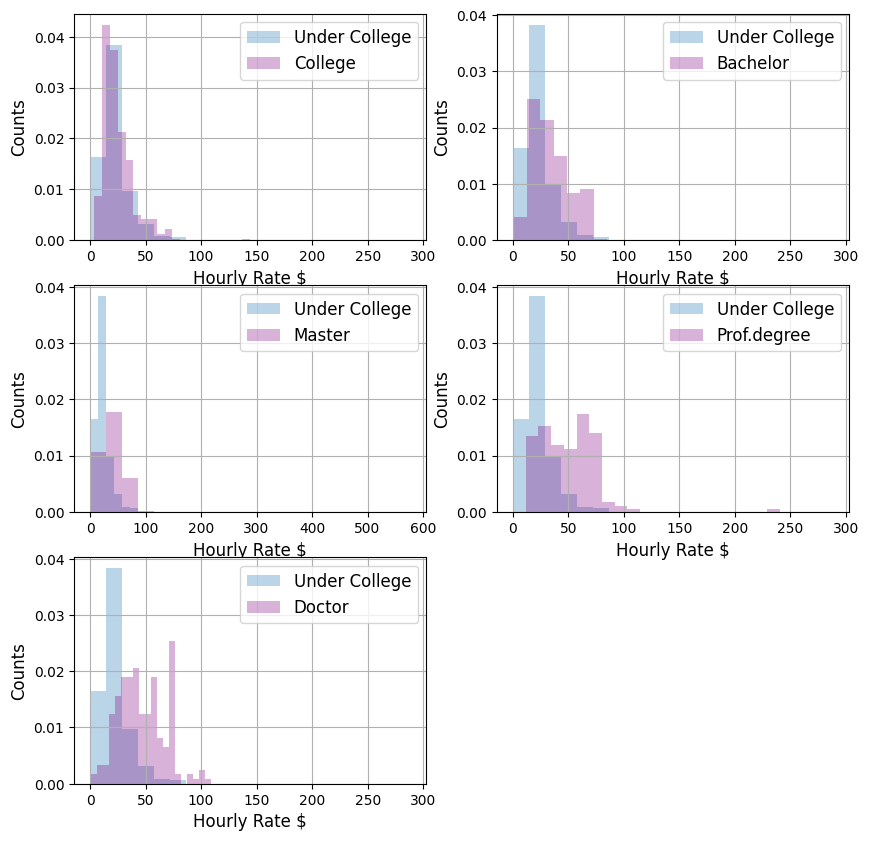

In [31]:
# plot income histograms
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
ax = ax.flatten()
for i, data_sub in enumerate(data_subsets):
    data_subset = data_sub[0]
    y = data_sub[1]
    y.name == 'Y'
    data_subset = pd.concat((data_subset, y), axis=1)
    
    
    plt.sca(ax[i])  # activate currect axis
    data_control = data_subset[(data_subset['T'] == 0)]
    data_control['Y'].hist(label='Under College', alpha=0.3, bins=20, density=True)
    
    data_treat = data_subset[(data_subset['T'] == 1)]
    data_treat['Y'].hist(label=education_dict[data_sub[2]], alpha=0.3, bins=20, density=True, color=color)

    plt.xlabel('Hourly Rate $', fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    plt.grid(True)
    plt.legend(prop={'size': font_size})

ax[-1].remove()
plt.show()

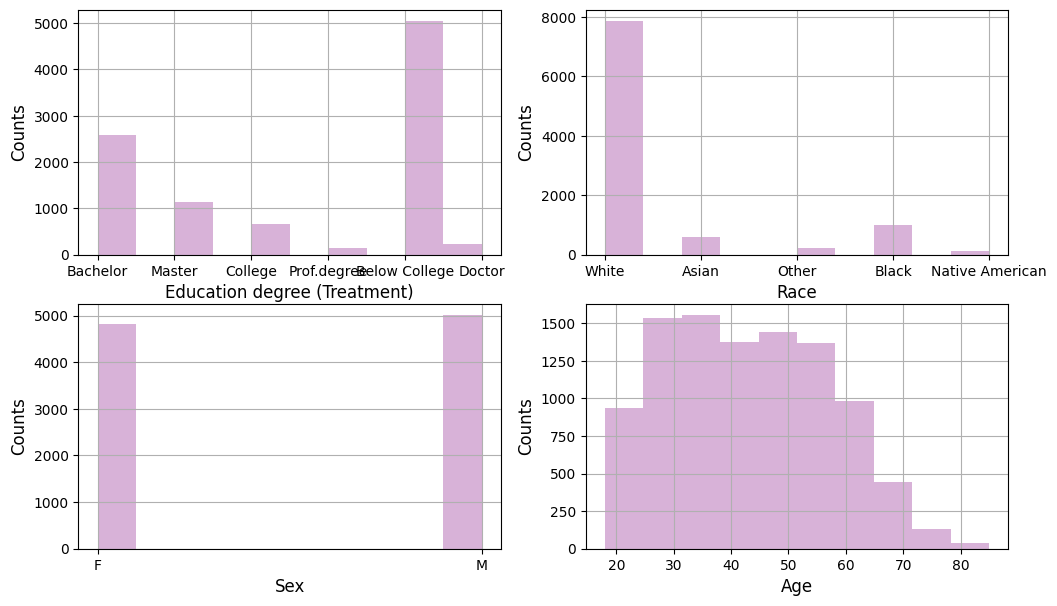

In [15]:
xlabel_dict = {'T': 'Education degree (Treatment)', 'PRDTRACE': 'Race', 'A_SEX': 'Sex', 'A_AGE': 'Age'}

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
ax = ax.flatten()
for i, col in enumerate(data.columns.drop('Y')):

    plt.sca(ax[i])  # activate currect axis

    data[col].hist(alpha=0.3, color=color)
    plt.xlabel(xlabel_dict[col], fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    plt.grid(True)
    
plt.show()

In [100]:
# TODO: Show propensity score graph
data_subsets, data = preprocess_data_selfemp(raw_data)
color = 'purple'

college 203.0
bachelors 700.0
masters 232.0
prof 74.0
doctorate 73.0


/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assert raw_data.isna().sum().sum() == 0
/home/jenya/OneDrive/Studies/097400 - Causal Inference/causal-inf-project-2023/preprocess.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
# ['PRDTRACE','A_SEX','A_AGE','T']
# Education-Salary plots
education_dict = {'U_college': 'Below College', 'college': 'College', 'bachelors': 'Bachelor', 'masters': 'Master', 'doctorate': 'Doctor', 'prof': 'Prof.degree'}

def edu_prep(x):
    return education_dict[x]

def sex_prep(x):
    if x == 0:
        return "F"
    elif x == 1:
        return 'M'

def race_prep(x):
    if x == 5:
        return 'Other'
    elif x == 1:
        return "White"
    elif x == 2:
        return "Black"
    elif x == 3:
        return "Native American"
    elif x == 4:
        return "Asian"
    
data['PRDTRACE'] = data['PRDTRACE'].apply(race_prep)
data['A_SEX'] = data['A_SEX'].apply(sex_prep)
data['T'] = data['T'].apply(edu_prep)

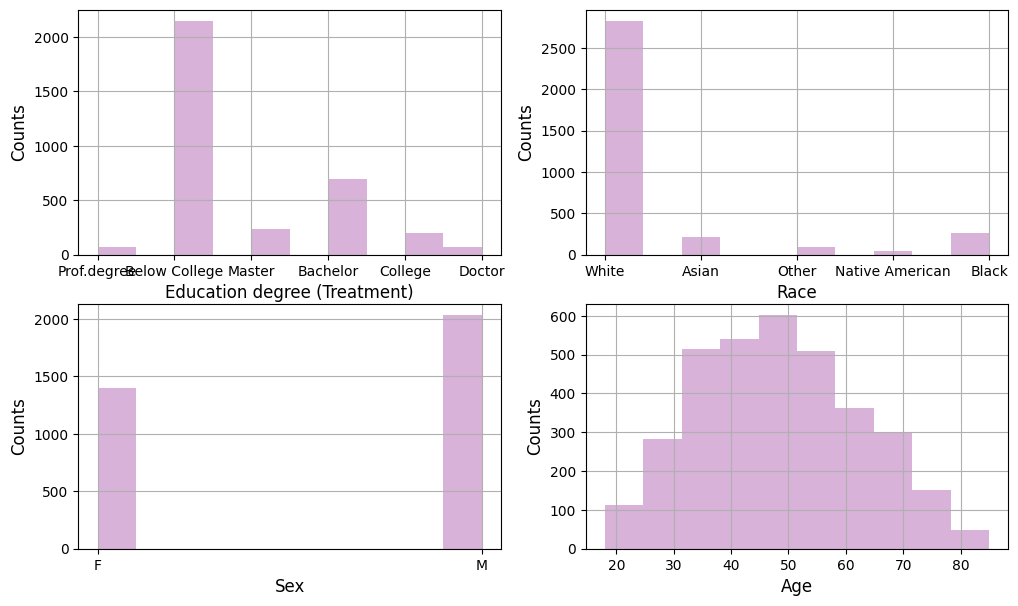

In [102]:
xlabel_dict = {'T': 'Education degree (Treatment)', 'PRDTRACE': 'Race', 'A_SEX': 'Sex', 'A_AGE': 'Age'}

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
ax = ax.flatten()
for i, col in enumerate(data.columns.drop('Y')):

    plt.sca(ax[i])  # activate currect axis

    data[col].hist(alpha=0.3, color=color)
    plt.xlabel(xlabel_dict[col], fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    plt.grid(True)
    
plt.show()

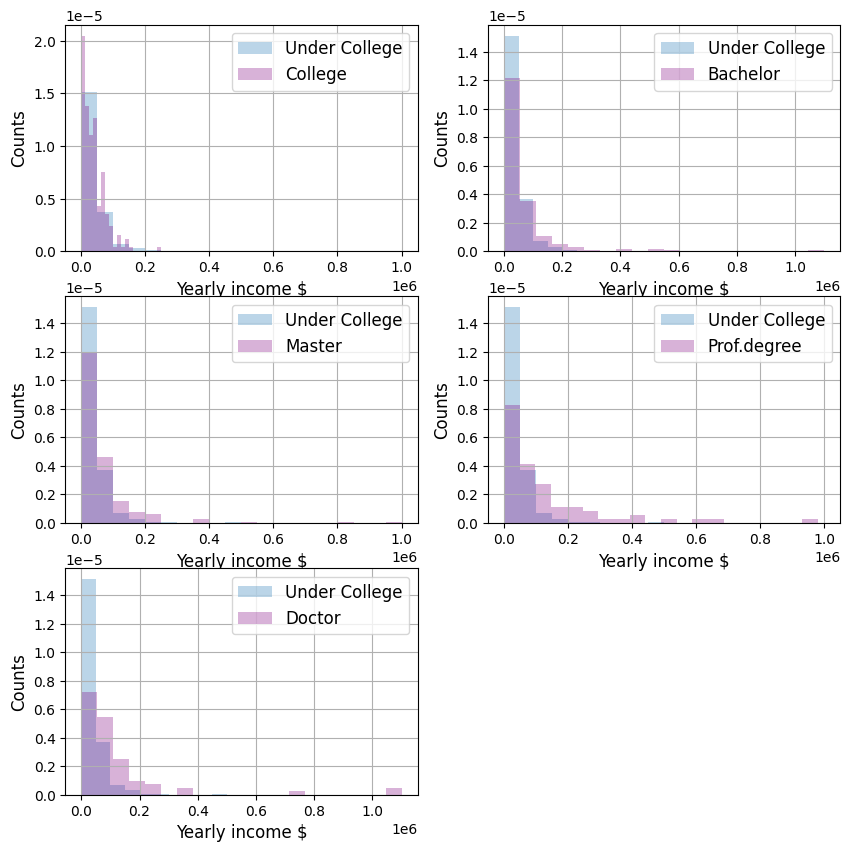

In [51]:
# plot income histograms
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
ax = ax.flatten()
for i, data_sub in enumerate(data_subsets):
    data_subset = data_sub[0]
    y = data_sub[1]
    y.name == 'Y'
    data_subset = pd.concat((data_subset, y), axis=1)
    
    
    plt.sca(ax[i])  # activate currect axis
    data_control = data_subset[(data_subset['T'] == 0)]
    data_control['Y'].hist(label='Under College', alpha=0.3, bins=20, density=True)
    
    data_treat = data_subset[(data_subset['T'] == 1)]
    data_treat['Y'].hist(label=education_dict[data_sub[2]], alpha=0.3, bins=20, density=True, color=color)

    plt.xlabel('Yearly income $', fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    plt.grid(True)
    plt.legend(prop={'size': font_size})

ax[-1].remove()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_cls = RandomForestClassifier(max_depth=4, random_state=seed)
xgb_cls = GradientBoostingClassifier(max_depth=4, random_state=seed)

logistic = LogisticRegression(max_iter=10000, tol=0.1)
scaler = StandardScaler()
linear = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])

models = [(linear, 'Linear'), (rf_cls, 'Random Forest'), (xgb_cls, 'XGBoost')]

  0%|          | 0/3 [00:00<?, ?it/s]

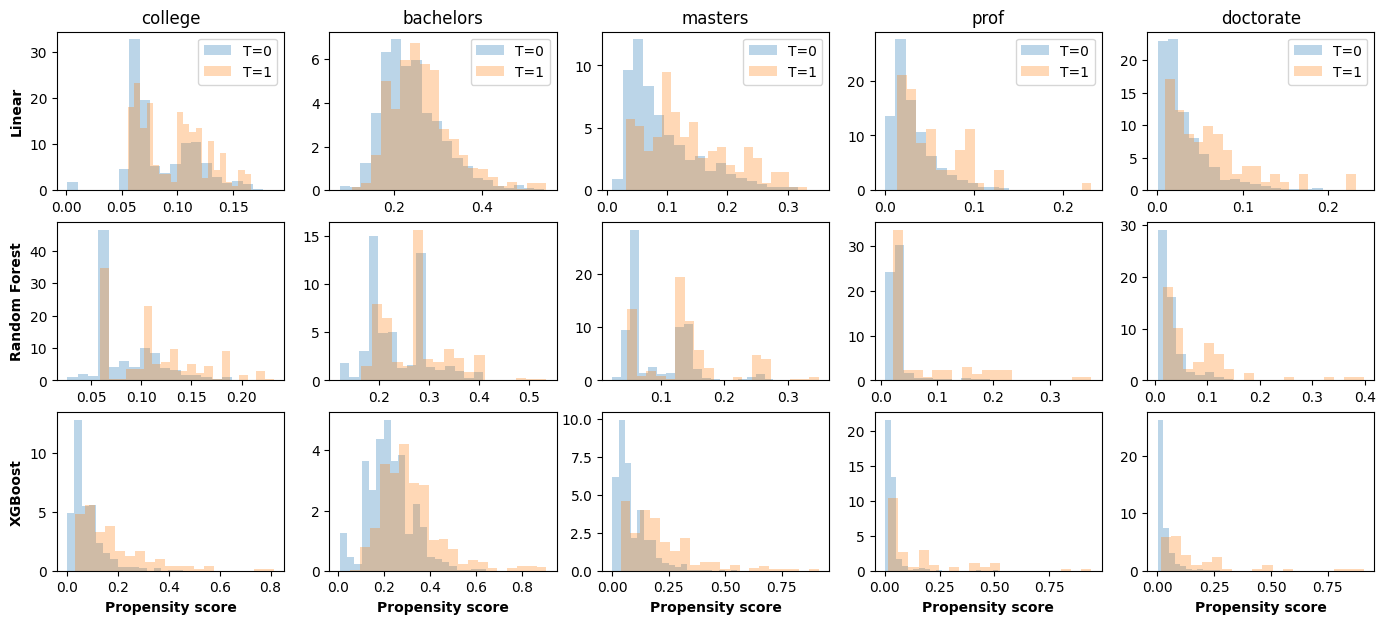

In [50]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(17,7))
ax = ax.flatten()
ind = 0
for idx, (model, model_name) in enumerate(tqdm(models)):
    row_names = []
    for col, data in enumerate(data_subsets):
        plt.sca(ax[ind])  # activate currect axis
        
        t = data[0]['T']
        X = data[0].drop(columns=['T']).copy()
        y = data[1]
        name = data[2]
        model.fit(X, t)
        row_names.append(name)
        
        propensity = model.predict_proba(X)[:, 1]
        prop0 = propensity[np.where(np.array(t) == 0)]
        prop1 = propensity[np.where(np.array(t) == 1)]
        plt.hist(prop0, bins=20, density=True, alpha=0.3, label='T=0')
        plt.hist(prop1, bins=20, density=True, alpha=0.3, label='T=1')
        
        if idx == 2:
            plt.xlabel('Propensity score', fontweight='bold')
        
        if idx == 0:
            plt.title(name, fontweight='bold')
            plt.legend()
        
        if col == 0:
            plt.ylabel(model_name, fontweight='bold')
        
        ind += 1

plt.show()